<a href="https://colab.research.google.com/github/CBravoR/AdvancedAnalyticsLabs/blob/master/Lab_3_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In this lab, we will set up a **data pipeline** in order to leave the data ready for analysis. Data preprocessing tends to be, by far, the most time-consuming step of the data science process. Errors in this step propagate to the model, so it is really important we do this correctly.

The goal of this step is to leave the date ready to apply models to it. 

Every problem has its own set of data preprocessing functions to apply it to, but we will focus on the ones most common in classification models. In general we want to:

1. Eliminate redundant variables.
2. Treat null values.
3. Treat outliers.
4. Remove correlated features.

For this goal we will use the excellent [```scikit-learn```](https://scikit-learn.org/stable/) package, which comes with most data-intensive operations. We will also use today (and during the rest of the module) the [```pandas```](https://pandas.pydata.org/) package, which allows for data handling in general.

***Important self-study: Go through the [10 minutes to Pandas tutorial](http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) if you haven't done so.***

## Reading the data

For this exercise we will read a dataset from credit scoring. I previously uploaded the data to Google, and it is available at https://docs.google.com/spreadsheets/d/1Am74y2ZVQ6dRFYVZUv_VoyP-OTS8BM4x0svifHQvtNc/export?gid=819627738&format=csv

The dataset (called **Bankloan**, from IBM) has a set of 1,000 loans with default information. It includes the following variables:

- Customer: ID, or unique label, of the borrower (NOT predictive).
- Age: Age of the borrower in years.
- Education: Maximum education level the borrower reached.
1: Complete primary. 2: Completed Secondary. 3: Incomplete Higher Ed. 4: Complete Higher Ed. 5: With postgraduate studies (complete MSc or PhD).
- Employ: Years at current job.
- Address: Years at current address.
- Income: Income in ‘000s USD.
- Leverage: Debt/Income Ratio.
- CredDebt: Credit card standing debt.
- OthDebt: Other debt in ‘000s USD.
- MonthlyLoad: Monthly percentage from salary used to repay debts.
- Default: 1 If default has occurred, 0 if not (Target variable).

The goal is to construct a model to predict whether the loan is going to default or not. We will use this dataset for the next three labs.

To actually get the data, we could:

- Download the file following the link.
- Upload the file to our Google Drive
- Connect the google drive to our own Colab session
- Import the file

This is... tedious. The second alternative is to simply download the file from the web directly to our session. This can be done with Linux's command ```wget```. This is NOT a Python command, but an operative system command, thus we need to invoke it with the prefix ```!``` which means "run this in the operative system".

The command is

```
wget [-options] path
```

We need to add the options ```--no-check-certificate``` and ```--output-document=FILENAME``` so it downloads ok.

In [0]:
!wget --no-check-certificate --output-document=Bankloan.csv 'https://docs.google.com/spreadsheets/d/1Am74y2ZVQ6dRFYVZUv_VoyP-OTS8BM4x0svifHQvtNc/export?gid=819627738&format=csv'

--2019-02-27 12:10:20--  https://docs.google.com/spreadsheets/d/1Am74y2ZVQ6dRFYVZUv_VoyP-OTS8BM4x0svifHQvtNc/export?gid=819627738&format=csv
Resolving docs.google.com (docs.google.com)... 74.125.195.139, 74.125.195.100, 74.125.195.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘Bankloan.csv’

Bankloan.csv            [ <=>                ]  65.91K  --.-KB/s    in 0.04s   

2019-02-27 12:10:21 (1.49 MB/s) - ‘Bankloan.csv’ saved [67496]



To check what we downloaded we can use the ```head``` OS command.

In [0]:
!head Bankloan.csv

customer,Age,Education,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default
10012,28,Med,7,2,44,17.7,2.99,4.8,0.58,0
10017,64,Posg,34,17,116,14.7,05.05,12,0.27,0
10030,40,Bas,20,12,61,4.8,01.04,1.89,0.13,0
10039,30,Bas,11,3,27,34.5,1.75,7.56,1.62,0
10069,25,Bas,2,2,30,22.4,0.76,5.96,0.97,1
10071,35,Bas,2,9,38,10.9,1.46,2.68,0.40,1
10096,26,1upInc,2,4,38,11.9,0.95,3.57,0.43,1
10128,25,Bas,4,2,30,14.4,01.05,3.27,0.62,0
10129,65,1upCom,29,14,189,5,3.36,06.09,0.08,0


Now we will use Pandas to read the CSV file. The  function to do so is [```read_csv```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). We will store the results in a variable named ```bankloan_data```.

In [0]:
import pandas as pd

bankloan_data = pd.read_csv('Bankloan.csv')

Now we can start exploring the data. First, a list of the variables and its types:

In [0]:
bankloan_data.dtypes

customer         int64
Age              int64
Education       object
Employ           int64
Address          int64
Income           int64
Leverage       float64
Creddebt       float64
OthDebt        float64
MonthlyLoad    float64
Default          int64
dtype: object

Int64 are integers, float64 are decimals, and object means a general type. In this case text.

Using the ```describe``` function we can get summary statistics of the numerical variables.

In [0]:
bankloan_data.describe()

,customer,Age,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,257714.548000,34.174000,6.952000,6.305333,59.588667,9.929333,1.934913,3.844327,0.365447,0.365333
std,139555.147719,13.142306,8.977644,6.047740,67.130160,6.671884,2.973909,5.333425,0.293937,0.481684
min,10012.000000,18.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98638.750000,24.000000,0.000000,2.000000,27.000000,4.800000,0.420000,1.107500,0.150000,0.000000
50%,315991.500000,31.000000,4.000000,5.000000,40.000000,8.500000,0.990000,2.215000,0.290000,0.000000
75%,370701.500000,42.000000,10.000000,9.000000,64.000000,13.525000,2.200000,4.572500,0.500000,1.000000
max,453777.000000,79.000000,63.000000,34.000000,1079.000000,40.700000,35.970000,63.470000,2.150000,1.000000


To get an idea of the different distributions of the data, we can plot the histograms of the variables. First, we import the graphic environment.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

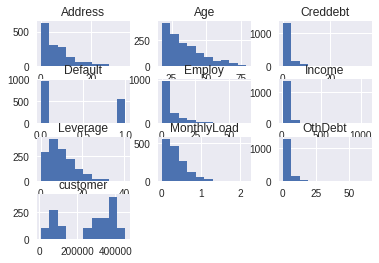

In [0]:
histograms = bankloan_data.hist()

However, there is a **far** more powerful package for visualizing data, that uses Pandas as its backend: [seaborn](https://seaborn.pydata.org). Let's visualize the dataset using this tool.

In [0]:
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


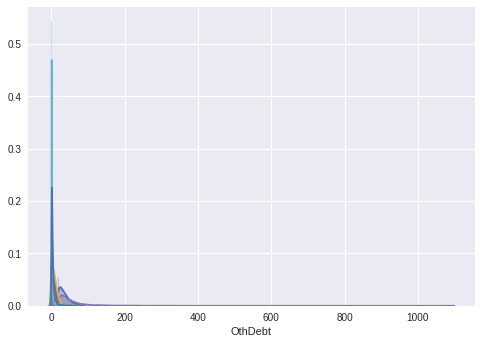

In [0]:
sns.set(color_codes=True)

for col_id in bankloan_data.columns[np.r_[1,3:9]]:
    sns.distplot(bankloan_data[col_id])

This is not that helpful due to the presence of outliers. The distributions are really skewed! Let's look at the variables in pairs to identify which ones to treat.

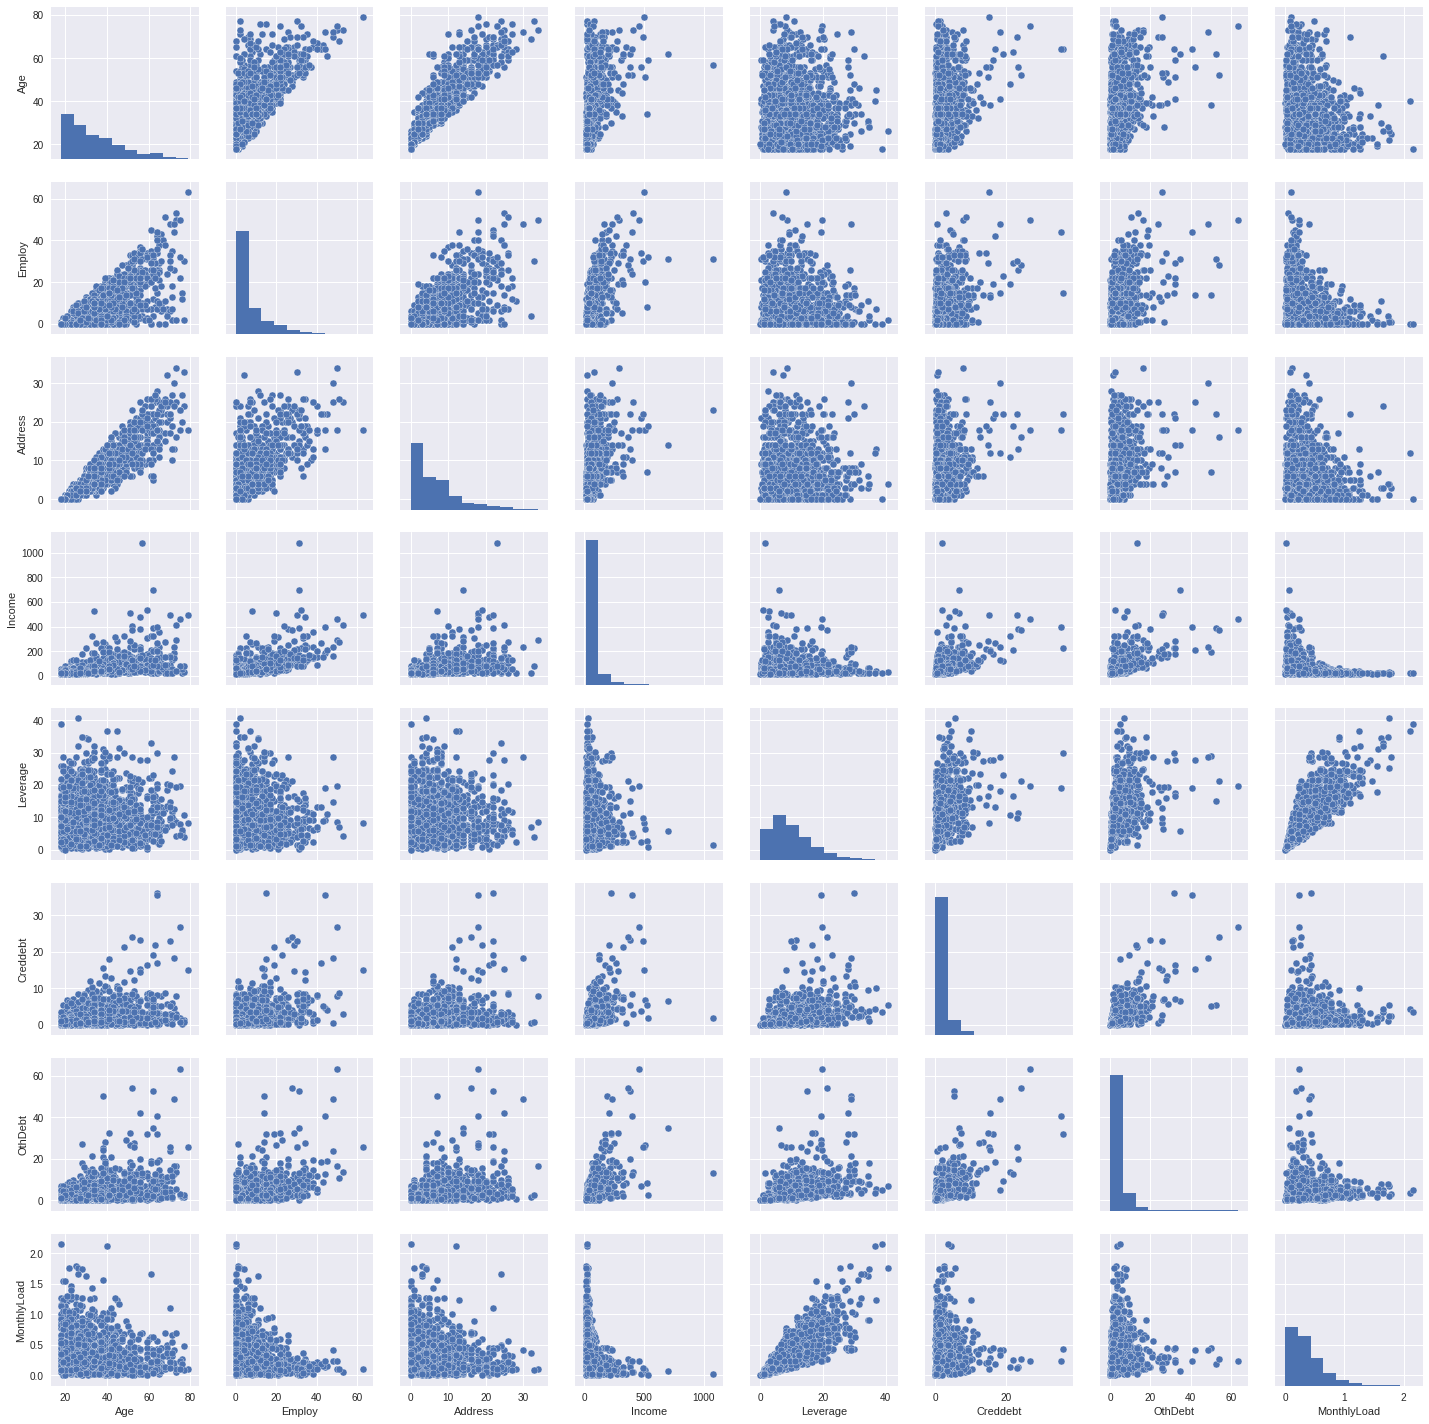

In [0]:
sns.pairplot(bankloan_data.iloc[:,1:-1])

Note the way of indexiding the data. by using ```[:,1:-1]``` we are asking Pandas to take all the rows, and from the first to the second to last column (thus the -1).

Seaborn can do many sophisticated (and aestetically pleasing) graphs. Go to [the Gallery](https://seaborn.pydata.org/examples/index.html) for details and example code. 

Now the outliers are much more clear. There are severe outliers in OthDebt, Creddebt and Income. These should probably be treated. 

Another way of visualizing this is with violin plots or with boxplots. We go back to Pandas for this.

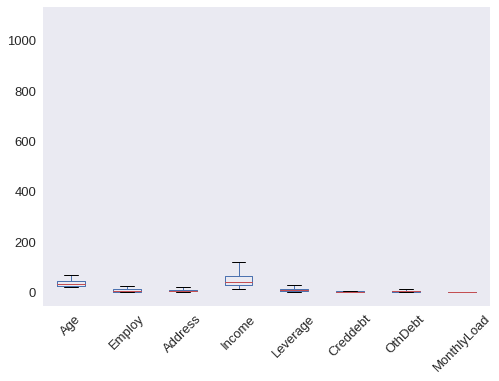

In [0]:
box = bankloan_data.iloc[:,1:-1].boxplot(grid=False, rot=45, fontsize=13)

## Data Cleaning

Now we can focus on cleaning the data. Let's start with the easy part: removing null values. **Remember to check when an outlier is a missing value** (invalid outliers).

### Null values

The core function here will be Panda's [```fillna```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). This allows to replace all null values (represented by None or NaN in Python) by a certain value. This also allows to set what the replacement will be with the ```value``` argument. See the help for details.

Remember the strategies to deal :

1. Keep: If the null values are a category by themselves. In this case, replace by something meaningful.

2. Delete: If the null values are too many **either by row or by column** then it is better to just drop the case or the variable.

3. Replace: If there are only a few missings for the variable or the row (<1% total), replace by the  replace the null values by the **median** for continous variables, and the **mode** for categorical values.

A quick study of our dataset shows there are no missing values, but if there were and we were to replace them, we could do it quickly with the following code.

In [0]:
# Fills out the null values with zeros. Inplace argument changes dataframe 
bankloan_data.fillna(value = 0, inplace=True)

In [0]:
bankloan_data.describe()

,customer,Age,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,257714.548000,34.174000,6.952000,6.305333,59.588667,9.929333,1.934913,3.844327,0.365447,0.365333
std,139555.147719,13.142306,8.977644,6.047740,67.130160,6.671884,2.973909,5.333425,0.293937,0.481684
min,10012.000000,18.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98638.750000,24.000000,0.000000,2.000000,27.000000,4.800000,0.420000,1.107500,0.150000,0.000000
50%,315991.500000,31.000000,4.000000,5.000000,40.000000,8.500000,0.990000,2.215000,0.290000,0.000000
75%,370701.500000,42.000000,10.000000,9.000000,64.000000,13.525000,2.200000,4.572500,0.500000,1.000000
max,453777.000000,79.000000,63.000000,34.000000,1079.000000,40.700000,35.970000,63.470000,2.150000,1.000000


### Outlier cleaning

Cleaning outlier, on the other hand, requires a much more manual intervention. We know there are three variables we need to intervene in: Income, Creddebt, and OthDebt. In general, we would like to modify all cases where there is either a discontinuous distribution or a case that is outside of 3 to 6 standard deviations.

It is very important to use your judgement in this! Don't just cut in 3 stds, as that is too restrictive in an exponential distribution. If you want to get an idea of the values, then seaborn can help. The function ```distplot``` allows to check the distribution of values.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


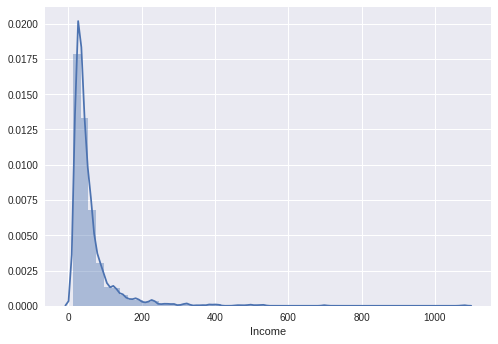

In [0]:
sns.distplot(bankloan_data['Income'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


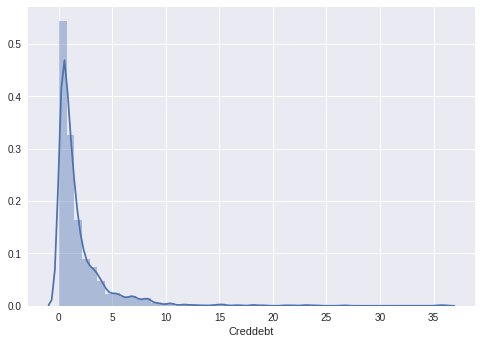

In [0]:
sns.distplot(bankloan_data['Creddebt'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


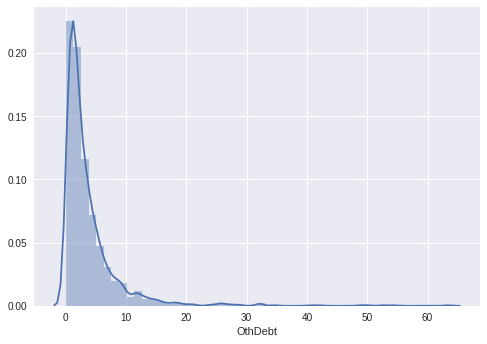

In [0]:
sns.distplot(bankloan_data['OthDebt'])

All variables need to be trimmed from the right. Potential cutoffs are Income of 300, Creddebt of 15, and Othdebt of 30.

To actually cut the values, then we can simply write a proper expression in Pandas:

In [0]:
bankloan_data = bankloan_data.loc[(bankloan_data['Income'] < 300) & (bankloan_data['Creddebt'] < 15) & (bankloan_data['OthDebt'] < 30)]

We can check now how the data looks like.

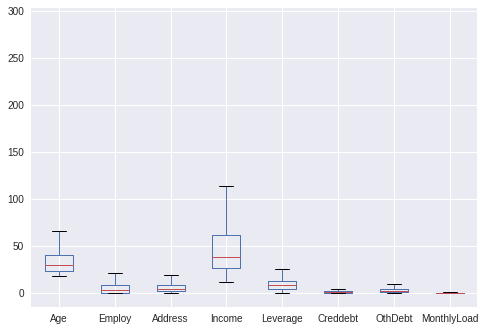

In [0]:
bankloan_data.iloc[:,1:-1].boxplot()

Much better, although income still has a large outlier. This plot might be misleading though, as the magnitud of the data is relevant. We might want to recheck this after normalizing the data.

## SELF STUDY

## Normalization

Most models require the inputs to be in the same scale, this is called **normalization**. It is very important for most models... except for credit scoring as we will use Weight of Evidence (see the lecture!). Still, this is fairly simple to do in Pandas, being smart about what columns we select and **mapping** a function to those columns.

The most traditional mapping is the zscore. We can use scipy's version of it. 



In [0]:
from scipy.stats import zscore

We now select all numeric columns, except the customer one. We can do this with ```select_dtypes```.

In [0]:
# Identify the numerical columns
numeric_cols = bankloan_data.select_dtypes(include=[np.number]).columns
numeric_cols 

Index(['customer', 'Age', 'Employ', 'Address', 'Income', 'Leverage',
       'Creddebt', 'OthDebt', 'MonthlyLoad', 'Default'],
      dtype='object')

In [0]:
# Remove the first and last one
numeric_cols = numeric_cols[1:-1]

In [0]:
# Apply the zscore function to all data
bankloan_data[numeric_cols] = bankloan_data[numeric_cols].apply(zscore)

Now the data should look much better.

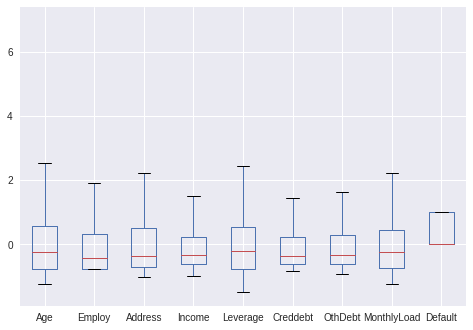

In [0]:
bankloan_data.iloc[:,1:].boxplot()

## Dummy coding

The final step will be transform the categorical variables to dummy variables. Again, this is **not necessary for credit scoring** as the WoE transform is much more robust. The best strategy here is to follow the 5% rule:

1. Aggregate by expert judgement (i.e. your opinion) until each group has more than 5% of data (1% if very large data) and there are all classes (by target variable) present.

2. Use target variable percentage (or classification trees) until you get a proper number of groups.

To check the number of cases for each default level, we can calculate a crosstab.

In [0]:
pd.crosstab(bankloan_data['Education'], bankloan_data['Default'])

Default,0,1
Education,,
1upCom,166,132
1upInc,210,117
Bas,180,64
Med,323,194
Posg,54,26


Now we can calculate the mean of each educational level.

In [0]:
bankloan_data.groupby('Education', as_index=False).agg({'Default': ["mean"]})

,Education,Default
,,mean
0,1upCom,0.442953
1,1upInc,0.357798
2,Bas,0.262295
3,Med,0.375242
4,Posg,0.325000


We could, if we wanted to, group together some educational levels, such as '1upInc', 'Med', and 'Posg'. If not, we can create dummy variables directly with Pandas ```get_dummies```

In [0]:
bankloan_data = pd.get_dummies(bankloan_data)
bankloan_data.describe()

,customer,Age,Employ,Address,Income,Leverage,Creddebt,OthDebt,MonthlyLoad,Default,Education_1upCom,Education_1upInc,Education_Bas,Education_Med,Education_Posg
count,1466.000000,1.466000e+03,1.466000e+03,1.466000e+03,1.466000e+03,1.466000e+03,1.466000e+03,1.466000e+03,1.466000e+03,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000
mean,257292.708731,-3.483647e-16,-7.701888e-17,7.459548e-17,6.172113e-17,-3.173148e-17,-6.550770e-17,-5.028568e-17,2.767984e-17,0.363574,0.203274,0.223056,0.166439,0.352660,0.054570
std,139836.339003,1.000341e+00,1.000341e+00,1.000341e+00,1.000341e+00,1.000341e+00,1.000341e+00,1.000341e+00,1.000341e+00,0.481192,0.402572,0.416438,0.372602,0.477961,0.227217
min,10012.000000,-1.231405e+00,-7.855789e-01,-1.039052e+00,-9.938332e-01,-1.497932e+00,-8.352320e-01,-9.251852e-01,-1.252944e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98156.750000,-7.594467e-01,-7.855789e-01,-6.969792e-01,-6.260690e-01,-7.689094e-01,-6.307663e-01,-6.302834e-01,-7.361277e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,316020.000000,-2.481589e-01,-4.202049e-01,-3.549064e-01,-3.318575e-01,-2.069543e-01,-3.639636e-01,-3.326511e-01,-2.362562e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,370670.750000,5.777675e-01,3.105429e-01,5.002756e-01,2.320477e-01,5.372565e-01,2.107844e-01,2.755838e-01,4.415356e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,453777.000000,3.409515e+00,5.425778e+00,4.776186e+00,5.797547e+00,4.683574e+00,6.331040e+00,6.977090e+00,6.033318e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now we are ready to apply general models!